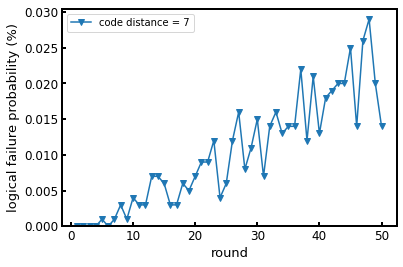

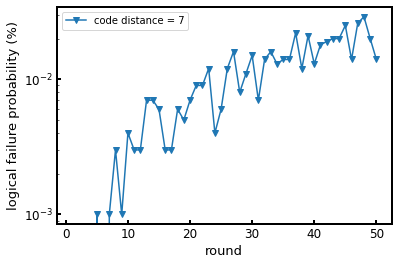

In [10]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os

################ 要変更 #################
# ファイル名
file = "ver2,p=0.001 ,eta=1000, d=(7,7,2), round=(1,50,1) , # of trials=100000" + ".csv"
########################################

# FUjii-labのパス
path = "/Users/konohideki/Documents/Fujii-lab/repetition_ver2"

# csvファイルの読み込み
os.chdir(path)
data = pd.read_csv(file, index_col=0)

# データフレームの行名(リスト)を取得
#ind = data.index

# データフレームの列名(リスト)を取得
code_distance_list = data.columns



##### グラフ作成 #####

plt.rcParams["xtick.direction"] = "in"     
plt.rcParams["ytick.direction"] = "in" 
fig, ax = plt.subplots()
round_list = np.arange(1,51,1)

for code_distance in code_distance_list:
    ax.plot(round_list, data[code_distance][1::2]*100,marker='v',label="code distance = "+str(code_distance))

ax.set_xticks(np.arange(0,51,10))
ax.set_xlabel("round", fontsize=13)
ax.set_ylabel("logical failure probability (%)", fontsize=13)
#ax.set_xlim(9,11)
ax.set_ylim(0,)
ax.spines["top"].set_linewidth(2)
ax.spines["left"].set_linewidth(2)
ax.spines["bottom"].set_linewidth(2)
ax.spines["right"].set_linewidth(2)
ax.tick_params(direction="in", width=2, length=4, labelsize=12)
#ax.set_title("X,p=(0.0001,0.0009,0.0001),d=(3,9,2),d(rep)=5,eta=1000,trials=10000", fontsize=14)
plt.legend()
plt.show()

##### グラフ作成 #####

plt.rcParams["xtick.direction"] = "in"     
plt.rcParams["ytick.direction"] = "in" 
fig, ax = plt.subplots()
round_list = np.arange(1,51,1)

for code_distance in code_distance_list:
    ax.plot(round_list, data[code_distance][1::2]*100,marker='v',label="code distance = "+str(code_distance))

ax.set_xticks(np.arange(0,51,10))
ax.set_xlabel("round", fontsize=13)
ax.set_ylabel("logical failure probability (%)", fontsize=13)
#ax.set_xlim(9,11)
#ax.set_ylim(0,)
ax.spines["top"].set_linewidth(2)
ax.spines["left"].set_linewidth(2)
ax.spines["bottom"].set_linewidth(2)
ax.spines["right"].set_linewidth(2)
ax.tick_params(direction="in", width=2, length=4, labelsize=12)
ax.set_yscale('log')
#ax.set_title("X,p=(0.0001,0.0009,0.0001),d=(3,9,2),d(rep)=5,eta=1000,trials=10000", fontsize=14)
plt.legend()
plt.show()

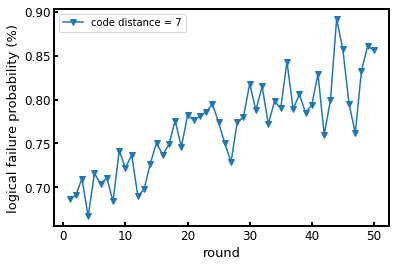

In [11]:
##### グラフ作成 #####

plt.rcParams["xtick.direction"] = "in"     
plt.rcParams["ytick.direction"] = "in" 
fig, ax = plt.subplots()
round_list = np.arange(1,51,1)

for code_distance in code_distance_list:
    ax.plot(round_list, data[code_distance][::2]*100,marker='v',label="code distance = "+str(code_distance))

ax.set_xticks(np.arange(0,51,10))
ax.set_xlabel("round", fontsize=13)
ax.set_ylabel("logical failure probability (%)", fontsize=13)
#ax.set_xlim(9,11)
#ax.set_ylim(12,17)
ax.spines["top"].set_linewidth(2)
ax.spines["left"].set_linewidth(2)
ax.spines["bottom"].set_linewidth(2)
ax.spines["right"].set_linewidth(2)
ax.tick_params(direction="in", width=2, length=4, labelsize=12)
plt.legend()
plt.show()

## フィッティング

In [12]:
def logical_error_list(p,round_list):
    return 1/2 * (1-(1-2*p)**round_list)

def dif_loss_fun(data_list,logical_error_list,p,round_list):
    answer = 0
    data_list = np.array(data_list)
    for num in round_list:
        answer += num * (1-2*p)**(num-1) * (data_list[num-1] - logical_error_list[num-1])
    return answer

def fit(data_list,initial_p,round_list,trials,alpha):
    # trials：試行回数
    # alpha：学習率
    p = initial_p # pの初期値
    data_list = np.array(data_list)
    # ロス関数
    #for i in round_list:
        #loss_fun = 1/2 * np.sum((data_list - logical_error_list(p,np.arange(1,round_list,1)))**2)
    for trial in range(trials):
        # pの更新
        p = p + alpha * dif_loss_fun(data_list,logical_error_list(p,round_list),p,round_list)
        loss_fun = 1/2 * np.sum((data_list - logical_error_list(p,round_list))**2)
        #print(p, loss_fun)
    return p

In [13]:
code_distance = 3

# フィッティング
initial_p = 0.0001
round_list = np.arange(1,51,1)
trials = 5000
alpha = 0.00002
fin_p = fit(data["9"][1::2],initial_p,round_list,trials,alpha)
print(fin_p)

##### グラフ作成 #####

plt.rcParams["xtick.direction"] = "in"     
plt.rcParams["ytick.direction"] = "in" 
fig, ax = plt.subplots()
round_list = np.arange(1,51,1)
ax.plot(round_list, data["9"][1::2]*100,marker='v',label="code distance = "+str(code_distance))
ax.plot(round_list, logical_error_list(fin_p,round_list)*100,marker='',label="code distance = "+str(code_distance))

ax.set_xticks(np.arange(0,51,10))
ax.set_xlabel("round", fontsize=13)
ax.set_ylabel("logical failure probability (%)", fontsize=13)
#ax.set_xlim(9,11)
#ax.set_ylim(12,17)
ax.spines["top"].set_linewidth(2)
ax.spines["left"].set_linewidth(2)
ax.spines["bottom"].set_linewidth(2)
ax.spines["right"].set_linewidth(2)
ax.tick_params(direction="in", width=2, length=4, labelsize=12)
#ax.set_title("X,p=(0.0001,0.0009,0.0001),d=(3,9,2),d(rep)=5,eta=1000,trials=10000", fontsize=14)
plt.legend()
plt.show()

KeyError: '9'

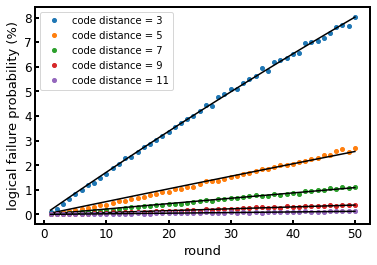

In [190]:
##### グラフ作成 #####

plt.rcParams["xtick.direction"] = "in"     
plt.rcParams["ytick.direction"] = "in" 
fig, ax = plt.subplots()
round_list = np.arange(1,51,1)

ss = 0
epsilon_list = []
for code_distance in code_distance_list:
    ax.plot(round_list, data[code_distance][1::2]*100,marker='o',markersize=4,linewidth=0,label="code distance = "+str(code_distance))
    # フィッティング
    initial_p = 0.0001
    round = 50
    trials = 5000
    alpha = 0.00002
    fin_p = fit(data[code_distance][1::2],initial_p,round_list,trials,alpha)
    ax.plot(round_list,logical_error_list(fin_p,round_list)*100,marker='', color="k")
    ss += 1
    epsilon_list.append(fin_p)

ax.set_xticks(np.arange(0,51,10))
ax.set_xlabel("round", fontsize=13)
ax.set_ylabel("logical failure probability (%)", fontsize=13)
#ax.set_xlim(9,11)
#ax.set_ylim(12,17)
ax.spines["top"].set_linewidth(2)
ax.spines["left"].set_linewidth(2)
ax.spines["bottom"].set_linewidth(2)
ax.spines["right"].set_linewidth(2)
ax.tick_params(direction="in", width=2, length=4, labelsize=12)
#ax.set_title("X,p=(0.0001,0.0009,0.0001),d=(3,9,2),d(rep)=5,eta=1000,trials=10000", fontsize=14)
plt.legend()
plt.show()

イプシロンをプロットして係数を求める

/Users/konohideki/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


[['3'], ['11']] [-4.13003433 -7.00937571]


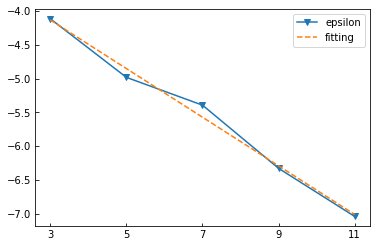

katamuki= [-0.35991767]
seppen= -3.050281313859017
C= [0.00204003]
gamma= [5.24608526]
P_th= [0.00095309]


In [123]:
from sklearn.linear_model import LinearRegression

"""
fig, ax = plt.subplots()
ax.plot(code_distance_list, epsilon_list,marker='o',markersize=4,linewidth=0)
ax.set_xticks(code_distance_list)
ax.set_xlabel("code distance", fontsize=13)
ax.set_ylabel("epsilon", fontsize=13)
#ax.set_xlim(9,11)
#ax.set_ylim(12,17)
ax.spines["top"].set_linewidth(2)
ax.spines["left"].set_linewidth(2)
ax.spines["bottom"].set_linewidth(2)
ax.spines["right"].set_linewidth(2)
ax.tick_params(direction="in", width=2, length=4, labelsize=12)
#ax.set_title("X,p=(0.0001,0.0009,0.0001),d=(3,9,2),d(rep)=5,eta=1000,trials=10000", fontsize=14)
plt.show()

fig, ax = plt.subplots()
ax.plot(code_distance_list, epsilon_list,marker='o',markersize=4,linewidth=0)
ax.set_xticks(code_distance_list)
ax.set_xlabel("code distance", fontsize=13)
ax.set_ylabel("epsilon", fontsize=13)
#ax.set_xlim(9,11)
#ax.set_ylim(12,17)
ax.spines["top"].set_linewidth(2)
ax.spines["left"].set_linewidth(2)
ax.spines["bottom"].set_linewidth(2)
ax.spines["right"].set_linewidth(2)
ax.tick_params(direction="in", width=2, length=4, labelsize=12)
ax.set_yscale('log')
#ax.set_title("X,p=(0.0001,0.0009,0.0001),d=(3,9,2),d(rep)=5,eta=1000,trials=10000", fontsize=14)
plt.show()
"""


### フィッティング
model = LinearRegression()
model.fit(np.reshape(code_distance_list,[5,1]), np.log10(epsilon_list))
source = [[code_distance_list[0]], [code_distance_list[-1]]]
source_ = [code_distance_list[0], code_distance_list[-1]]
predicted = model.predict(source)
predicted_re = [10**predicted[0], 10**predicted[1]]
print(source, predicted)

fig, ax = plt.subplots()
#ax.set_yscale('log')
ax.plot(code_distance_list,np.log10(epsilon_list),marker='v',label="epsilon")
ax.plot(source_, predicted,linestyle="dashed",label="fitting")
#ax.set_title("p=" + str(p*100) + "%, eta=" + str(eta) + ", repeat=" + str(20) + ", trials=" + str(100000), fontsize=14)
ax.set_xticks(code_distance_list)
plt.legend()
plt.show()


logc = model.intercept_ - model.coef_
slope = model.coef_
print("katamuki=",model.coef_) 
print("seppen=",model.intercept_ ) 
print("C=",10**logc) 
print("gamma=",10**(-2*slope))
print("P_th=",0.005/(10**(-2*slope)))

### 0.5%

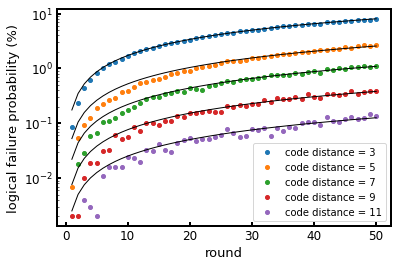

NameError: name 'LinearRegression' is not defined

In [7]:
################ 要変更 #################
# ファイル名
file = "p=0.5% ,eta=1000, d=11, round=(1,50,1) , # of trials=100000" + ".csv"
########################################

# FUjii-labのパス
path = "/Users/konohideki/Documents/Fujii-lab/repetition"

# csvファイルの読み込み
os.chdir(path)
data = pd.read_csv(file, index_col=0)

##### グラフ作成 #####

plt.rcParams["xtick.direction"] = "in"     
plt.rcParams["ytick.direction"] = "in" 
fig, ax = plt.subplots()
round_list = np.arange(1,51,1)
code_distance_list = data.columns

ss = 0
epsilon_list = []
for code_distance in code_distance_list:
    ax.plot(round_list, data[code_distance][1::2]*100,marker='o',markersize=4,linewidth=0,label="code distance = "+str(code_distance))
    # フィッティング
    initial_p = 0.0001
    round = 50
    trials = 5000
    alpha = 0.00002
    fin_p = fit(data[code_distance][1::2],initial_p,round_list,trials,alpha)
    ax.plot(round_list,logical_error_list(fin_p,round_list)*100,marker='', color="k",linewidth=1)
    ss += 1
    epsilon_list.append(fin_p)

ax.set_xticks(np.arange(0,51,10))
ax.set_xlabel("round", fontsize=13)
ax.set_ylabel("logical failure probability (%)", fontsize=13)
#ax.set_xlim(9,11)
#ax.set_ylim(12,17)
ax.set_yscale('log')
ax.spines["top"].set_linewidth(2)
ax.spines["left"].set_linewidth(2)
ax.spines["bottom"].set_linewidth(2)
ax.spines["right"].set_linewidth(2)
ax.tick_params(direction="in", width=2, length=4, labelsize=12)
#ax.set_title("X,p=(0.0001,0.0009,0.0001),d=(3,9,2),d(rep)=5,eta=1000,trials=10000", fontsize=14)
plt.legend()
plt.show()

### フィッティング
model = LinearRegression()
model.fit(np.reshape(code_distance_list,[5,1]), np.log10(epsilon_list))
source = [[code_distance_list[0]], [code_distance_list[-1]]]
source_ = [code_distance_list[0], code_distance_list[-1]]
predicted = model.predict(source)
predicted_re = [10**predicted[0], 10**predicted[1]]
print(source, predicted)

fig, ax = plt.subplots()
ax.set_yscale('log')
ax.plot(code_distance_list,np.log10(epsilon_list),marker='v',label="epsilon",markersize=8,linewidth=0)
ax.plot(source_, predicted,linestyle="dashed",label="fitting",color="k")
#ax.set_title("p=" + str(p*100) + "%, eta=" + str(eta) + ", repeat=" + str(20) + ", trials=" + str(100000), fontsize=14)
ax.set_xticks(code_distance_list)
ax.set_xlabel("code distance", fontsize=13)
ax.set_ylabel(r"$\log\epsilon$", fontsize=13)
ax.spines["top"].set_linewidth(2)
ax.spines["left"].set_linewidth(2)
ax.spines["bottom"].set_linewidth(2)
ax.spines["right"].set_linewidth(2)
ax.tick_params(direction="in", width=2, length=4, labelsize=12)
plt.legend()
plt.show()


logC = model.intercept_ - model.coef_
slope = model.coef_
Cc = 10**logC
P_th = 0.005*(10**(-2*slope))
print("katamuki=",model.coef_) 
print("seppen=",model.intercept_ ) 
print("C=",10**logC) 
print("gamma=",10**(-2*slope))
print("P_th=",0.005*(10**(-2*slope)))

print(epsilon_list)

[1.77209475e-03 8.08954055e-04 3.69284239e-04 1.68576755e-04
 7.69546038e-05]


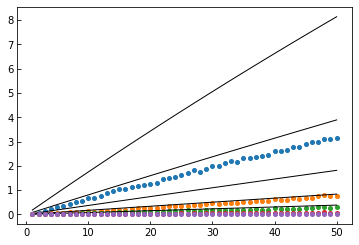

In [214]:
C= 0.0085038
P_th= 0.010953

### 再現
code_distance_list = np.array([3,5,7,9,11])
ep = Cc * (P_th/0.005) ** (-(np.array(code_distance_list)+1)/2)
print(ep)

fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    pp = 1/2 * (1-(1-2*ep[i])**round_list)
    ax.plot(round_list, pp*100,marker='',markersize=4,linewidth=1, color="k")
    ax.plot(round_list, data[str(2*i+3)][1::2]*100,marker='o',markersize=4,linewidth=0,label="code distance = "+str(code_distance))

### 0.4%

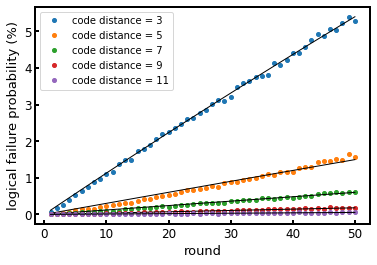

[['3'], ['11']] [-2.9631899  -4.94999717]


/Users/konohideki/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


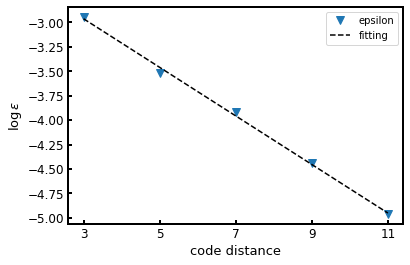

katamuki= [-0.24835091]
seppen= -2.2181371749505563
C= [0.01072047]
gamma= [3.13835319]
P_th= [0.01569177]
[0.0011410234133757842, 0.0003036979977304236, 0.00012115535493900043, 3.6132132058039436e-05, 1.0865748319900874e-05]


In [219]:
################ 要変更 #################
# ファイル名
file = "p=0.4% ,eta=1000, d=11, round=(1,50,1) , # of trials=100000" + ".csv"
########################################

# FUjii-labのパス
path = "/Users/konohideki/Documents/Fujii-lab/repetition"

# csvファイルの読み込み
os.chdir(path)
data = pd.read_csv(file, index_col=0)

##### グラフ作成 #####

plt.rcParams["xtick.direction"] = "in"     
plt.rcParams["ytick.direction"] = "in" 
fig, ax = plt.subplots()
round_list = np.arange(1,51,1)
code_distance_list = data.columns

ss = 0
epsilon_list = []
for code_distance in code_distance_list:
    ax.plot(round_list, data[code_distance][1::2]*100,marker='o',markersize=4,linewidth=0,label="code distance = "+str(code_distance))
    # フィッティング
    initial_p = 0.0001
    round = 50
    trials = 5000
    alpha = 0.00002
    fin_p = fit(data[code_distance][1::2],initial_p,round_list,trials,alpha)
    ax.plot(round_list,logical_error_list(fin_p,round_list)*100,marker='', color="k",linewidth=1)
    ss += 1
    epsilon_list.append(fin_p)

ax.set_xticks(np.arange(0,51,10))
ax.set_xlabel("round", fontsize=13)
ax.set_ylabel("logical failure probability (%)", fontsize=13)
#ax.set_xlim(9,11)
#ax.set_ylim(12,17)
ax.spines["top"].set_linewidth(2)
ax.spines["left"].set_linewidth(2)
ax.spines["bottom"].set_linewidth(2)
ax.spines["right"].set_linewidth(2)
ax.tick_params(direction="in", width=2, length=4, labelsize=12)
#ax.set_title("X,p=(0.0001,0.0009,0.0001),d=(3,9,2),d(rep)=5,eta=1000,trials=10000", fontsize=14)
plt.legend()
plt.show()

### フィッティング
model = LinearRegression()
model.fit(np.reshape(code_distance_list,[5,1]), np.log10(epsilon_list))
source = [[code_distance_list[0]], [code_distance_list[-1]]]
source_ = [code_distance_list[0], code_distance_list[-1]]
predicted = model.predict(source)
predicted_re = [10**predicted[0], 10**predicted[1]]
print(source, predicted)

fig, ax = plt.subplots()
#ax.set_yscale('log')
ax.plot(code_distance_list,np.log10(epsilon_list),marker='v',label="epsilon",markersize=8,linewidth=0)
ax.plot(source_, predicted,linestyle="dashed",label="fitting",color="k")
#ax.set_title("p=" + str(p*100) + "%, eta=" + str(eta) + ", repeat=" + str(20) + ", trials=" + str(100000), fontsize=14)
ax.set_xticks(code_distance_list)
ax.set_xlabel("code distance", fontsize=13)
ax.set_ylabel(r"$\log\epsilon$", fontsize=13)
ax.spines["top"].set_linewidth(2)
ax.spines["left"].set_linewidth(2)
ax.spines["bottom"].set_linewidth(2)
ax.spines["right"].set_linewidth(2)
ax.tick_params(direction="in", width=2, length=4, labelsize=12)
plt.legend()
plt.show()


logC = model.intercept_ - model.coef_
slope = model.coef_
Cc = 10**logC
P_th = 0.005*(10**(-2*slope))
print("katamuki=",model.coef_) 
print("seppen=",model.intercept_ ) 
print("C=",10**logC) 
print("gamma=",10**(-2*slope))
print("P_th=",0.005*(10**(-2*slope)))

print(epsilon_list)

### 0.3%

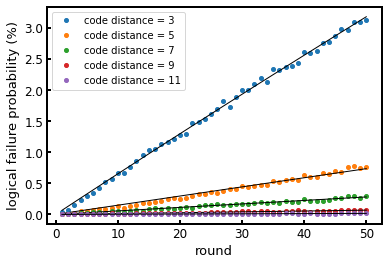

/Users/konohideki/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


[['3'], ['11']] [-3.19521079 -5.44485858]


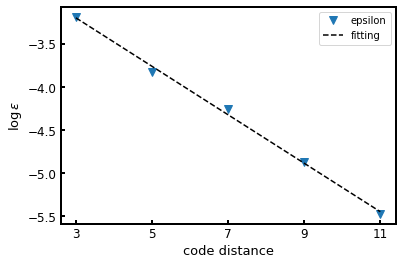

katamuki= [-0.28120597]
seppen= -2.3515928671862394
C= [0.0085038]
gamma= [3.65100096]
P_th= [0.010953]
[0.0006572927378995785, 0.00014841342587035088, 5.640787094903298e-05, 1.3665902871521332e-05, 3.33900084574834e-06]


In [220]:
################ 要変更 #################
# ファイル名
file = "p=0.3% ,eta=1000, d=11, round=(1,50,1) , # of trials=100000" + ".csv"
########################################

# FUjii-labのパス
path = "/Users/konohideki/Documents/Fujii-lab/repetition"

# csvファイルの読み込み
os.chdir(path)
data = pd.read_csv(file, index_col=0)

##### グラフ作成 #####

plt.rcParams["xtick.direction"] = "in"     
plt.rcParams["ytick.direction"] = "in" 
fig, ax = plt.subplots()
round_list = np.arange(1,51,1)
code_distance_list = data.columns

ss = 0
epsilon_list = []
for code_distance in code_distance_list:
    ax.plot(round_list, data[code_distance][1::2]*100,marker='o',markersize=4,linewidth=0,label="code distance = "+str(code_distance))
    # フィッティング
    initial_p = 0.0001
    round = 50
    trials = 5000
    alpha = 0.00002
    fin_p = fit(data[code_distance][1::2],initial_p,round_list,trials,alpha)
    ax.plot(round_list,logical_error_list(fin_p,round_list)*100,marker='', color="k",linewidth=1)
    ss += 1
    epsilon_list.append(fin_p)

ax.set_xticks(np.arange(0,51,10))
ax.set_xlabel("round", fontsize=13)
ax.set_ylabel("logical failure probability (%)", fontsize=13)
#ax.set_xlim(9,11)
#ax.set_ylim(12,17)
ax.spines["top"].set_linewidth(2)
ax.spines["left"].set_linewidth(2)
ax.spines["bottom"].set_linewidth(2)
ax.spines["right"].set_linewidth(2)
ax.tick_params(direction="in", width=2, length=4, labelsize=12)
#ax.set_title("X,p=(0.0001,0.0009,0.0001),d=(3,9,2),d(rep)=5,eta=1000,trials=10000", fontsize=14)
plt.legend()
plt.show()

### フィッティング
model = LinearRegression()
model.fit(np.reshape(code_distance_list,[5,1]), np.log10(epsilon_list))
source = [[code_distance_list[0]], [code_distance_list[-1]]]
source_ = [code_distance_list[0], code_distance_list[-1]]
predicted = model.predict(source)
predicted_re = [10**predicted[0], 10**predicted[1]]
print(source, predicted)

fig, ax = plt.subplots()
#ax.set_yscale('log')
ax.plot(code_distance_list,np.log10(epsilon_list),marker='v',label="epsilon",markersize=8,linewidth=0)
ax.plot(source_, predicted,linestyle="dashed",label="fitting",color="k")
#ax.set_title("p=" + str(p*100) + "%, eta=" + str(eta) + ", repeat=" + str(20) + ", trials=" + str(100000), fontsize=14)
ax.set_xticks(code_distance_list)
ax.set_xlabel("code distance", fontsize=13)
ax.set_ylabel(r"$\log\epsilon$", fontsize=13)
ax.spines["top"].set_linewidth(2)
ax.spines["left"].set_linewidth(2)
ax.spines["bottom"].set_linewidth(2)
ax.spines["right"].set_linewidth(2)
ax.tick_params(direction="in", width=2, length=4, labelsize=12)
plt.legend()
plt.show()


logC = model.intercept_ - model.coef_
slope = model.coef_
Cc = 10**logC
P_th = 0.003*(10**(-2*slope))
print("katamuki=",model.coef_) 
print("seppen=",model.intercept_) 
print("C=",10**logC) 
print("gamma=",10**(-2*slope))
print("P_th=",0.003*(10**(-2*slope)))

print(epsilon_list)

[0.0085038]
[6.37953776e-04 1.74733938e-04 4.78591872e-05 1.31085113e-05
 3.59038833e-06]


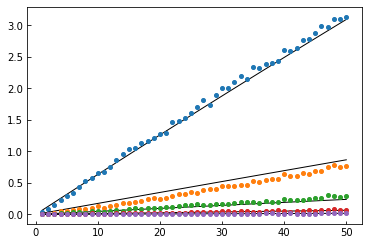

In [213]:
### 再現
print(Cc)
code_distance_list = np.array([3,5,7,9,11])
ep = Cc * (P_th/0.003) ** (-(np.array(code_distance_list)+1)/2)
print(ep)

fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    pp = 1/2 * (1-(1-2*ep[i])**round_list)
    ax.plot(round_list, pp*100,marker='',markersize=4,linewidth=1, color="k")
    ax.plot(round_list, data[str(2*i+3)][1::2]*100,marker='o',markersize=4,linewidth=0,label="code distance = "+str(code_distance))

### 0.2%

NameError: name 'fit' is not defined

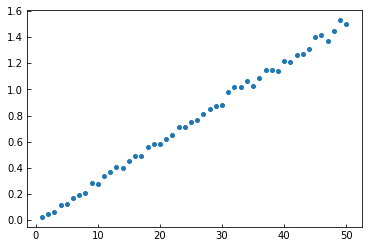

In [3]:
################ 要変更 #################
# ファイル名
file = "p=0.2% ,eta=1000, d=11, round=(1,50,1) , # of trials=100000" + ".csv"
########################################

# FUjii-labのパス
path = "/Users/konohideki/Documents/Fujii-lab/repetition"

# csvファイルの読み込み
os.chdir(path)
data = pd.read_csv(file, index_col=0)

##### グラフ作成 #####

plt.rcParams["xtick.direction"] = "in"     
plt.rcParams["ytick.direction"] = "in" 
fig, ax = plt.subplots()
round_list = np.arange(1,51,1)
code_distance_list = data.columns

ss = 0
epsilon_list = []
for code_distance in code_distance_list:
    ax.plot(round_list, data[code_distance][1::2]*100,marker='o',markersize=4,linewidth=0,label="code distance = "+str(code_distance))
    # フィッティング
    initial_p = 0.0001
    round = 50
    trials = 5000
    alpha = 0.00002
    fin_p = fit(data[code_distance][1::2],initial_p,round_list,trials,alpha)
    ax.plot(round_list,logical_error_list(fin_p,round_list)*100,marker='', color="k",linewidth=1)
    ss += 1
    epsilon_list.append(fin_p)

ax.set_xticks(np.arange(0,51,10))
ax.set_xlabel("round", fontsize=13)
ax.set_ylabel("logical failure probability (%)", fontsize=13)
#ax.set_xlim(9,11)
#ax.set_ylim(12,17)
ax.spines["top"].set_linewidth(2)
ax.spines["left"].set_linewidth(2)
ax.spines["bottom"].set_linewidth(2)
ax.spines["right"].set_linewidth(2)
ax.tick_params(direction="in", width=2, length=4, labelsize=12)
#ax.set_title("X,p=(0.0001,0.0009,0.0001),d=(3,9,2),d(rep)=5,eta=1000,trials=10000", fontsize=14)
plt.legend()
plt.show()

### フィッティング
model = LinearRegression()
model.fit(np.reshape(code_distance_list,[5,1]), np.log10(epsilon_list))
source = [[code_distance_list[0]], [code_distance_list[-1]]]
source_ = [code_distance_list[0], code_distance_list[-1]]
predicted = model.predict(source)
predicted_re = [10**predicted[0], 10**predicted[1]]
print(source, predicted)

fig, ax = plt.subplots()
ax.set_yscale('log')
ax.plot(code_distance_list,np.log10(epsilon_list),marker='v',label="epsilon",markersize=8,linewidth=0)
ax.plot(source_, predicted,linestyle="dashed",label="fitting",color="k")
#ax.set_title("p=" + str(p*100) + "%, eta=" + str(eta) + ", repeat=" + str(20) + ", trials=" + str(100000), fontsize=14)
ax.set_xticks(code_distance_list)
ax.set_xlabel("code distance", fontsize=13)
ax.set_ylabel(r"$\log\epsilon$", fontsize=13)
ax.spines["top"].set_linewidth(2)
ax.spines["left"].set_linewidth(2)
ax.spines["bottom"].set_linewidth(2)
ax.spines["right"].set_linewidth(2)
ax.tick_params(direction="in", width=2, length=4, labelsize=12)
plt.legend()
plt.show()


logC = model.intercept_ - model.coef_
slope = model.coef_
Cc = 10**logC
P_th = 0.003*(10**(-2*slope))
print("katamuki=",model.coef_) 
print("seppen=",model.intercept_) 
print("C=",10**logC) 
print("gamma=",10**(-2*slope))
print("P_th=",0.003*(10**(-2*slope)))

print(epsilon_list)

### 0.1%

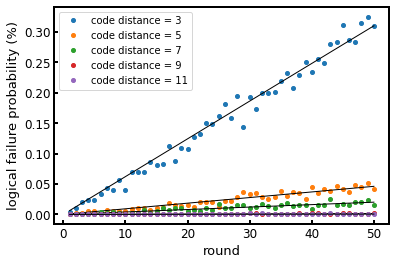

/Users/konohideki/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


[['3'], ['11']] [-4.21770319 -7.04689752]


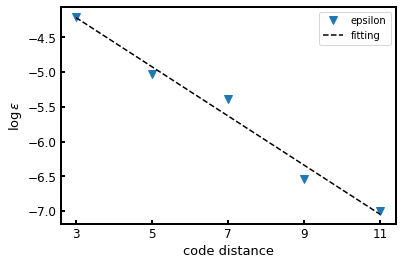

katamuki= [-0.35364929]
seppen= -3.156755319810225
C= [0.0015736]
gamma= [5.09681161]
P_th= [0.00509681]
[6.221135056124972e-05, 9.24222576898638e-06, 4.028094312702551e-06, 2.930722943959408e-07, 1.0157284721615325e-07]


In [222]:
################ 要変更 #################
# ファイル名
file = "ver2,p=0.1% ,eta=1000, d=11, round=(1,50,1) , # of trials=100000" + ".csv"
########################################

# FUjii-labのパス
path = "/Users/konohideki/Documents/Fujii-lab/repetition"

# csvファイルの読み込み
os.chdir(path)
data = pd.read_csv(file, index_col=0)

##### グラフ作成 #####

plt.rcParams["xtick.direction"] = "in"     
plt.rcParams["ytick.direction"] = "in" 
fig, ax = plt.subplots()
round_list = np.arange(1,51,1)
code_distance_list = data.columns

ss = 0
epsilon_list = []
for code_distance in code_distance_list:
    ax.plot(round_list, data[code_distance][1::2]*100,marker='o',markersize=4,linewidth=0,label="code distance = "+str(code_distance))
    # フィッティング
    initial_p = 0.0001
    round = 50
    trials = 5000
    alpha = 0.00002
    fin_p = fit(data[code_distance][1::2],initial_p,round_list,trials,alpha)
    ax.plot(round_list,logical_error_list(fin_p,round_list)*100,marker='', color="k",linewidth=1)
    ss += 1
    epsilon_list.append(fin_p)

ax.set_xticks(np.arange(0,51,10))
ax.set_xlabel("round", fontsize=13)
ax.set_ylabel("logical failure probability (%)", fontsize=13)
#ax.set_xlim(9,11)
#ax.set_ylim(12,17)
ax.spines["top"].set_linewidth(2)
ax.spines["left"].set_linewidth(2)
ax.spines["bottom"].set_linewidth(2)
ax.spines["right"].set_linewidth(2)
ax.tick_params(direction="in", width=2, length=4, labelsize=12)
#ax.set_title("X,p=(0.0001,0.0009,0.0001),d=(3,9,2),d(rep)=5,eta=1000,trials=10000", fontsize=14)
plt.legend()
plt.show()

### フィッティング
model = LinearRegression()
model.fit(np.reshape(code_distance_list,[5,1]), np.log10(epsilon_list))
source = [[code_distance_list[0]], [code_distance_list[-1]]]
source_ = [code_distance_list[0], code_distance_list[-1]]
predicted = model.predict(source)
predicted_re = [10**predicted[0], 10**predicted[1]]
print(source, predicted)

fig, ax = plt.subplots()
#ax.set_yscale('log')
ax.plot(code_distance_list,np.log10(epsilon_list),marker='v',label="epsilon",markersize=8,linewidth=0)
ax.plot(source_, predicted,linestyle="dashed",label="fitting",color="k")
#ax.set_title("p=" + str(p*100) + "%, eta=" + str(eta) + ", repeat=" + str(20) + ", trials=" + str(100000), fontsize=14)
ax.set_xticks(code_distance_list)
ax.set_xlabel("code distance", fontsize=13)
ax.set_ylabel(r"$\log\epsilon$", fontsize=13)
ax.spines["top"].set_linewidth(2)
ax.spines["left"].set_linewidth(2)
ax.spines["bottom"].set_linewidth(2)
ax.spines["right"].set_linewidth(2)
ax.tick_params(direction="in", width=2, length=4, labelsize=12)
plt.legend()
plt.show()


logC = model.intercept_ - model.coef_
slope = model.coef_
Cc = 10**logC
P_th = 0.001*(10**(-2*slope))
print("katamuki=",model.coef_) 
print("seppen=",model.intercept_ ) 
print("C=",10**logC) 
print("gamma=",10**(-2*slope))
print("P_th=",0.001*(10**(-2*slope)))

print(epsilon_list)

[7.41251644e-05 1.41296149e-05 2.69336356e-06 5.13404459e-07
 9.78642995e-08]


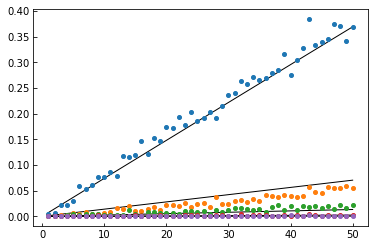

In [211]:
### 再現
code_distance_list = np.array([3,5,7,9,11])
ep = Cc * (P_th/0.001) ** (-(np.array(code_distance_list)+1)/2)
print(ep)

fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    pp = 1/2 * (1-(1-2*ep[i])**round_list)
    ax.plot(round_list, pp*100,marker='',markersize=4,linewidth=1, color="k")
    ax.plot(round_list, data[str(2*i+3)][1::2]*100,marker='o',markersize=4,linewidth=0,label="code distance = "+str(code_distance))